# Esempio analisi dati europei sulle emissioni dei gas serra con Python
<span style="color:red">**Nota**: alcuni aggiustamenti sono stati inseriti dopo la registrazione del webinar, per facilitare ulteriormente la lettura e l'analisi. Il link alla registrazione del webinar è [questo](https://www.youtube.com/watch?v=a07jSho77bg).</span>


## Importazione di `pandas`
Per cominciare, importiamo `pandas`.
`pandas` è una libreria di Python per la manipolazione e l'analisi dei dati.

In [1]:
import pandas as pd

`pandas` include automaticamente al suo interno `numpy`, `scipy` e `matplotlib`.

## Lettura e pulizia dei dati
`pandas` integra delle funzioni già pronte di importazione delle principali tipologie di dato in circolazione:
- `pandas.read_csv()`
- `pandas.read_json()`
- `pandas.read_html()`
- `pandas.read_xml()`
- `pandas.read_csv()`
- `pandas.read_excel()`
- `pandas.read_sql()`

Nel nostro caso utilizziamo il dataset [Greenhouse gas emissions by source sector](https://ec.europa.eu/eurostat/databrowser/view/env_air_gge/default/table?lang=en) di Eurostat, che si presenta in formato CSV.

In [2]:
# Sorgente file: https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/ENV_AIR_GGE/?format=SDMX-CSV&compressed=false&i
data = pd.read_csv('env_air_gge_linear.csv.gz') # Il file è compresso e salvato nella stessa cartella in cui è salvato questo notebook
data.shape

(1967692, 10)

Abbiamo creato una struttura dati di `pandas` che si chiama **DataFrame**. Si tratta di una tabella di dati SQL: le **righe** sono identificate da un **indice**, le colonne corrispondono ai **campi**. Nel nostro caso ci sono quasi 2 milioni di righe e 10 colonne.

Adesso occupiamoci di capire come si presentino i dati ancora 'grezzi' nel nostro DataFrame.

In [3]:
data.head() # Default: stampa le prime 5 righe

,DATAFLOW,LAST UPDATE,freq,unit,airpol,src_crf,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ENV_AIR_GGE(1.0),10/06/22 11:00:00,A,MIO_T,CH4,CRF1,AT,1990,0.04858,NaN
1,ESTAT:ENV_AIR_GGE(1.0),10/06/22 11:00:00,A,MIO_T,CH4,CRF1,AT,1991,0.04369,NaN
2,ESTAT:ENV_AIR_GGE(1.0),10/06/22 11:00:00,A,MIO_T,CH4,CRF1,AT,1992,0.04278,NaN
3,ESTAT:ENV_AIR_GGE(1.0),10/06/22 11:00:00,A,MIO_T,CH4,CRF1,AT,1993,0.04038,NaN
4,ESTAT:ENV_AIR_GGE(1.0),10/06/22 11:00:00,A,MIO_T,CH4,CRF1,AT,1994,0.03347,NaN


Notiamo subito che non è così facile capire cosa significhino queste codifiche e, d'altro canto, è necessario che alcune informazioni siano opportunamente codificate. Quando i dati open sono distribuiti correttamente, sono disponibili dei **metadati** che li descrivono. Eurostat mette a disposizione una pagina per ogni dataset. Nel caso del nostro dataset: [env_air_gge](https://ec.europa.eu/eurostat/cache/metadata/en/env_air_gge_esms.htm).

Oltre ai valori osservati (**OBS_VALUE**), questo dataset ha 5 dimensioni principali:
- Inquinanti dell'aria (**AIRPOL**), ovvero i nomi dei gas serra.
- Entità geopolitiche (**GEO**).
- Il settore da cui provengono le emissioni (**SRC_CRF**), ad esempio quello energetico.
- L'anno di riferimento (**TIME**).
- L'unità di misura con cui leggere il dato (**UNIT**), nel nostro caso le migliaia o i milioni di tonnellate.

Andiamo ad analizzare le singole colonne sulla base dello spaccato qui sopra.

In [4]:
data.columns

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'airpol', 'src_crf', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')

Le colonne **DATAFLOW** e **LAST UPDATE** sembrano poco utili alla nostra analisi. Proviamo ad analizzarle più nel dettaglio per capire se è vero.

In [5]:
data.DATAFLOW.describe()

count                    1967692
unique                         1
top       ESTAT:ENV_AIR_GGE(1.0)
freq                     1967692
Name: DATAFLOW, dtype: object

La colonna **DATAFLOW** è un riferimento all'origine dei dati, che è l'Agenzia Europea dell'Ambiente. Contiene effettivamente sempre lo stesso valore (*unique = 1*) replicato 1967692 volte.

In [6]:
data['LAST UPDATE'].describe()
# Nota: il nome della colonna ha uno spazio in mezzo, quindi sfruttiamo l'occasione per utilizzare una sintassi diversa per l'accesso

count               1967692
unique                    1
top       10/06/22 11:00:00
freq                1967692
Name: LAST UPDATE, dtype: object

Per la colonna **LAST UPDATE**, il discorso è analogo: si tratta della data di aggiornamento del dato, che è la stessa per tutti i 1967692 record della tabella.

Eliminiamo queste due colonne.

In [7]:
data.drop(columns=['DATAFLOW','LAST UPDATE'], inplace=True)

Si noti che senza inserire il parametro `inplace=True` (come comportamento standard la funzione ha `inplace=False`), `pandas` crea un riferimento al dataframe di partenza (invece di crearne una copia modificata). In generale, per ragioni di performance e - in certi contesti - di comodità, questo è il comportamento standard di Python: creare riferimenti anziché copie.

Su un blocco note come il nostro, modificare i dati inplace ha lo svantaggio che non si può ri-eseguire il codice soprastante con la garanzia che i risultati siano i medesimi.

Il nostro DataFrame ora si presenta così:

In [8]:
data.describe(include='all')

,freq,unit,airpol,src_crf,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
count,1967692,1967692,1967692,1967692,1967692,1.967692e+06,1.697730e+06,269962
unique,1,2,11,172,36,NaN,NaN,4
top,A,MIO_T,GHG,TOTXMEMONIA,HU,NaN,NaN,z
freq,1967692,983846,380140,24820,65630,NaN,NaN,223924
mean,NaN,NaN,NaN,NaN,NaN,2.004706e+03,7.070011e+03,NaN
std,NaN,NaN,NaN,NaN,NaN,9.071653e+00,1.273772e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,1.985000e+03,-4.583370e+05,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.997000e+03,0.000000e+00,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.005000e+03,4.349500e-02,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.013000e+03,1.097602e+01,NaN


Notiamo che il metodo `describe()` consente di avere informazioni di natura statistica sul DataFrame (si notino le differenze tra le colonne contenenti stringhe e quelle contenenti numeri). Il parametro `include='all'` serve a non limitare la descrizione alle sole colonne numeriche, che sarebbe il comportamento di default, a meno di non averne.

Da qui notiamo che la colonna **freq** andrà eliminata (rappresenta la frequenza di diffusione del dato, che è annuale in tutti i casi) e quindi provvediamo.

In [9]:
data.drop('freq', axis=1, inplace=True)

A scopo dimostrativo, abbiamo usato una maniera leggermente diversa di effettuare il drop: tramite il parametro `axis=1` stiamo indicando che l'etichetta `'freq'` è il nome di una colonna e non di una riga (le righe si indicano con `axis=0`, che è il valore di default). Questa maniera di riferirsi alle colonne e alle righe è propria di molte funzioni di `pandas`, quindi è bene impararla.

La situazione ora è la seguente:

In [10]:
data.head()

,unit,airpol,src_crf,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,MIO_T,CH4,CRF1,AT,1990,0.04858,NaN
1,MIO_T,CH4,CRF1,AT,1991,0.04369,NaN
2,MIO_T,CH4,CRF1,AT,1992,0.04278,NaN
3,MIO_T,CH4,CRF1,AT,1993,0.04038,NaN
4,MIO_T,CH4,CRF1,AT,1994,0.03347,NaN


### Dizionari per le codifiche
Vogliamo qui predisporre delle strutture dati che ci consentano di codificare il contenuto delle colonne: vorremmo per esempio poter associare al dato `'AT'` la stringa `'Austria'`. Per farlo, sfruttiamo una struttura dati di Python: il **dizionario** (che non è altro che un array associativo, in cui le chiavi non sono i numeri naturali in ordine crescente e progressivo - in Python questa struttura si chiama lista - ma possono essere sia numeri che stringhe).

Le codifiche sono disponibili in [un apposito repository](https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?sort=1&dir=dic%2Fen) di Eurostat in formato .dic, che dobbiamo capire come trattare. Ci avvaliamo della direttiva `with` che ci semplifica le operazioni di apertura e chiusura del file. Si noti che per identificare i blocchi di codice Python richiede di utilizzare l'indentazione (tramite spazi o tramite tabulazioni), quindi la direttiva `with` è seguita dal relativo blocco di codice indentato.

In [11]:
# Sorgente file: https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?sort=1&file=dic%2Fen%2Fgeo.dic
with open('geo.dic', encoding='utf8') as f:
    line = f.readline()
line

'EUR\tEurope\n'

Le linee del file sono le coppie chiave-valore del dizionario, separate da un carattere di tabulazione `\t` e chiuse da un carattere newline `\n`. Possiamo quindi costruire il nostro dizionario per i codici della colonna **geo** rimuovendo l'ultimo carattere `\n` e spezzando ciascuna linea all'occorrere del carattere `'\t'`.

In [12]:
from itertools import islice

with open('geo.dic', encoding='utf8') as f:
    geo_dic = dict([line[:-1].split("\t") for line in f])

Costruiamo anche una piccola funzione per stampare solo una porzione del dizionario (le prime `n` righe):

In [13]:
from itertools import islice

def dict_head(d, n = 5):
    return dict(islice(d.items(), 0, n))

dict_head(geo_dic)

{'EUR': 'Europe',
 'EU': 'European Union (EU6-1958, EU9-1973, EU10-1981, EU12-1986, EU15-1995, EU25-2004, EU27-2007, EU28-2013, EU27-2020)',
 'EU_V': 'European Union (aggregate changing according to the context)',
 'EU27_2020_EFTA': 'European Union - 27 countries (from 2020) and European Free Trade Association (EFTA) countries',
 'EU27_2020_IS_K': 'European Union - 27 countries (from 2020) and Iceland under the Kyoto Protocol'}

Tramite il metodo `map()` dei Dataframe di `pandas`, potremo poi associare ai codici della colonna **geo** le stringhe con i nomi per esteso. In questo modo possiamo - per esempio - vedere quanti dati disponiamo nel nostro dataframe per ciascuna delle nazioni presenti, senza impazzire con i codici delle nazioni.

In [14]:
data.geo.map(geo_dic).value_counts()

Hungary                                                                           65630
Slovenia                                                                          62152
Romania                                                                           59550
Poland                                                                            57698
Ireland                                                                           57500
Spain                                                                             56944
Slovakia                                                                          56838
European Union - 27 countries (from 2020)                                         56770
Denmark                                                                           56458
Lithuania                                                                         56072
Finland                                                                           56054
Bulgaria                        

Il metodo `value_counts()` consente di associare ad una Serie di `pandas` il numero di occorrenze di ciascun record. Sostanzialmente è un modo per costruire una tabella delle frequenze di ciascuna modalità.

Controlliamo se ci sono valori `NaN`, poiché il metodo `map()` associa `NaN` a tutti i codici non presenti tra le chiavi del dizionario. Asseriamo allora che il numero dei dati `NaN` sia zero, perché questo restituirà un errore solo in caso l'asserzione si verifichi essere falsa:

In [15]:
assert data.geo.map(geo_dic).isna().sum() == 0

Il metodo `isna()` restituisce il valore `True` in corrispondenza di input che sono `NaN`, mentre il valore `False` in corrispondenza di input che non sono `NaN`.
Il metodo `sum()` restituisce la somma dei valori lungo le righe (o lungo le colonne se gli viene passato il parametro `axis=1`). Nel caso di valori booleani, restituisce la somma dei valori `True`. Si noti che un modo più elegante di fare questa operazione era di utilizzare `assert data.geo.map(geo_dic).notna().all()` (che restituisce `True` solo nel caso la serie di dati mappati contenga anche solo un valore `False`).

Rimuoviamo anche dal dizionario le chiavi non presenti nel dataset, in modo che il dizionario rappresenti tutte e sole le informazioni a disposizione. Lo facciamo sfruttando la cosiddetta *dict comprehension*, una delle caratteristiche distintive del Python, grazie alla quale possiamo innestare un ciclo `for` all'interno della definizione di un dizionario.

In [16]:
geo_dic = {k:geo_dic[k] for k in data.geo.unique().tolist()}
dict_head(geo_dic)

{'AT': 'Austria',
 'BE': 'Belgium',
 'BG': 'Bulgaria',
 'CH': 'Switzerland',
 'CY': 'Cyprus'}

In questo contesto è importante osservare che fino al 1989 la Germania era divisa e quindi il codice corrispondente alla Germania fa riferimento ai territori della Repubblica Federale di Germania, mentre dal 1990 fa riferimento alla Germania unificata. Il riferimento a territori diversi con una stessa sigla deve spingere alla massima attenzione nei confronti dei relativi dati!!

**Nota importante:** le righe corrispondenti ai codici `'EU27_2020'`, `'EU28'` e `'EU28_IS_K'` riportano dati aggregati di tutti gli stati dell'Unione Europea. Bisogna quindi ricordarsi di escluderle quando opportuno! Costruiamo un dizionario che non comprenda i codici di dati aggregati, per poterli escludere agevolmente all'occorrenza. Sfruttiamo la direttiva `del` per eliminare gli elementi da una copia del dizionario. Si noti la sintassi del ciclo `for` in Python, che si serve di una sequenza di valori da scorrere per assegnare i valori al relativo indice (questo assomiglia molto ad un metodo iterativo, nello stile dei linguaggi orientati agli oggetti).

In [17]:
geo_dict_noagg = geo_dic.copy()
for k in ['EU27_2020','EU28','EU28_IS_K']:
    del geo_dict_noagg[k]

geo_dict_noagg

{'AT': 'Austria',
 'BE': 'Belgium',
 'BG': 'Bulgaria',
 'CH': 'Switzerland',
 'CY': 'Cyprus',
 'CZ': 'Czechia',
 'DE': 'Germany (until 1990 former territory of the FRG)',
 'DK': 'Denmark',
 'EE': 'Estonia',
 'EL': 'Greece',
 'ES': 'Spain',
 'FI': 'Finland',
 'FR': 'France',
 'HR': 'Croatia',
 'HU': 'Hungary',
 'IE': 'Ireland',
 'IS': 'Iceland',
 'IT': 'Italy',
 'LI': 'Liechtenstein',
 'LT': 'Lithuania',
 'LU': 'Luxembourg',
 'LV': 'Latvia',
 'MT': 'Malta',
 'NL': 'Netherlands',
 'NO': 'Norway',
 'PL': 'Poland',
 'PT': 'Portugal',
 'RO': 'Romania',
 'SE': 'Sweden',
 'SI': 'Slovenia',
 'SK': 'Slovakia',
 'TR': 'Türkiye',
 'UK': 'United Kingdom'}

Si noti l'utilizzo del metodo `copy()` per creare una copia effettiva del dizionario, da modificare successivamente. Abbiamo infatti bisogno di effettuare questa operazione perché altrimenti l'operatore di assegnazione non effettua una vera copia ma un semplice riferimento e dunque l'eliminazione e/o la modifica di componenti di un dizionario influisce anche sul contenuto dell'altro (e viceversa).

Ora possiamo fare lo stesso discorso per i codici delle altre colonne. Ecco quella per i gas serra:

In [18]:
# Sorgente file: https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?sort=1&file=dic%2Fen%2Fairpol.dic
with open('airpol.dic', encoding='utf8') as f:
    airpol_dic = dict([line[:-1].split("\t") for line in f])

assert data.airpol.map(airpol_dic).notna().all()
airpol_dic = {k:airpol_dic[k] for k in data.airpol.unique().tolist()}
data.airpol.value_counts() # I nomi per esteso sono lunghi, quindi qui stampiamo i codici

GHG                 380140
CH4                 282590
CH4_CO2E            282590
CO2                 265924
N2O                 262258
N2O_CO2E            262258
HFC_CO2E             52788
PFC_CO2E             49038
SF6_CO2E             48334
HFC_PFC_NSP_CO2E     41252
NF3_CO2E             40520
Name: airpol, dtype: int64

In [19]:
airpol_dic

{'CH4': 'Methane',
 'CH4_CO2E': 'Methane (CO2 equivalent)',
 'CO2': 'Carbon dioxide',
 'GHG': 'Greenhouse gases (CO2, N2O in CO2 equivalent, CH4 in CO2 equivalent, HFC in CO2 equivalent, PFC in CO2 equivalent, SF6 in CO2 equivalent, NF3 in CO2 equivalent)',
 'HFC_CO2E': 'Hydrofluorocarbones (CO2 equivalent)',
 'HFC_PFC_NSP_CO2E': 'Hydrofluorocarbones and perfluorocarbones - not specified mix (CO2 equivalent)',
 'N2O': 'Nitrous oxide',
 'N2O_CO2E': 'Nitrous oxide (CO2 equivalent)',
 'NF3_CO2E': 'Nitrogen trifluoride (CO2 equivalent)',
 'PFC_CO2E': 'Perfluorocarbones (CO2 equivalent)',
 'SF6_CO2E': 'Sulphur hexafluoride (CO2 equivalent)'}

**Nota importante:** le righe corrispondenti ai codici che terminano con *_CO2E* quantificano l'effetto del corrispondente gas serra sul riscaldamento globale, convertito in ammontare di CO<sub>2</sub>. Inoltre le righe corrispondenti al codice `'GHG'` sono relative ai valori aggregati di tutti i gas serra (convertiti in ammontare di CO<sub>2</sub>).
Anche in questa situazione bisognerà fare attenzione in fase di aggregazione dei dati. Costruiamo il dizionario con i valori non aggregati convertiti in ammontare di CO<sub>2</sub>:

In [20]:
airpol_dic_noagg_co2e = airpol_dic.copy()
for k in ['CH4','GHG','HFC_PFC_NSP_CO2E','N2O']:
    del airpol_dic_noagg_co2e[k]
airpol_dic_noagg_co2e

{'CH4_CO2E': 'Methane (CO2 equivalent)',
 'CO2': 'Carbon dioxide',
 'HFC_CO2E': 'Hydrofluorocarbones (CO2 equivalent)',
 'N2O_CO2E': 'Nitrous oxide (CO2 equivalent)',
 'NF3_CO2E': 'Nitrogen trifluoride (CO2 equivalent)',
 'PFC_CO2E': 'Perfluorocarbones (CO2 equivalent)',
 'SF6_CO2E': 'Sulphur hexafluoride (CO2 equivalent)'}

Costruiamo anche il dizionario con i valori non aggregati e non convertiti in ammontare di CO<sub>2</sub>:

In [21]:
airpol_dic_noagg = {k:airpol_dic[k] for k in ['CH4','CO2','N2O']}
airpol_dic_noagg

{'CH4': 'Methane', 'CO2': 'Carbon dioxide', 'N2O': 'Nitrous oxide'}

Infine, lavoriamo sul dizionario dei settori di provenienza delle emissioni:

In [22]:
# Sorgente file: https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?sort=1&file=dic%2Fen%2Fsrc_crf.dic
with open('src_crf.dic', encoding='utf8') as f:
    src_crf_dic = dict([line[:-1].split("\t") for line in f])

assert data.src_crf.map(src_crf_dic).notna().all()
src_crf_dic = {k:src_crf_dic[k] for k in data.src_crf.unique().tolist()}

data.src_crf.value_counts()

TOTXMEMONIA      24820
TOTXMEMONIT      24820
TOTX4_MEMONIT    24788
TOTX4_MEMONIA    24788
CRF2             24600
                 ...  
CRF3I             4380
CRF_INDCO2        3932
CRF5F1            3752
CRF5F2            3752
CRF5F3            3628
Name: src_crf, Length: 172, dtype: int64

In [23]:
dict_head(src_crf_dic)

{'CRF1': 'Energy',
 'CRF1A': 'Fuel combustion - sectoral approach',
 'CRF1A1': 'Fuel combustion in energy industries',
 'CRF1A1A': 'Fuel combustion in public electricity and heat production',
 'CRF1A1B': 'Fuel combustion in petroleum refining'}

**Nota importante:** le righe corrispondenti ai codici che cominciano con con *TOT* sono dei "totali", ovvero sono somme parziali dei dati relativi ad altre righe (si vedano anche [i metadati](https://ec.europa.eu/eurostat/cache/metadata/en/env_air_gge_esms.htm#stat_pres1655190747652)). Costruiamo anche qui il corrispondente dizionario con i valori non aggregati:

In [24]:
src_crf_dic_noagg = src_crf_dic.copy()
for k in ['TOTXMEMO', 'TOTX4_MEMO', 'TOTX4_MEMONIA','TOTXMEMONIA','TOTX4_MEMONIT','TOTXMEMONIT']:
    del src_crf_dic_noagg[k]
dict_head(src_crf_dic_noagg)

{'CRF1': 'Energy',
 'CRF1A': 'Fuel combustion - sectoral approach',
 'CRF1A1': 'Fuel combustion in energy industries',
 'CRF1A1A': 'Fuel combustion in public electricity and heat production',
 'CRF1A1B': 'Fuel combustion in petroleum refining'}

### Conversione delle unità di misura
La colonna dell'unità di misura può essere eliminata a patto di convertire i valori osservati tutti nella stessa unità di misura. Nei dati in esame ci sono due codici diversi:

In [25]:
data.unit.value_counts(dropna=False)

MIO_T    983846
THS_T    983846
Name: unit, dtype: int64

Il codice `MIO_T` indica che il valore di **OBS_VALUE** è in milioni di tonnellate, mentre il codice `THS_T` indica che il valore di **OBS_VALUE** è in migliaia di tonnellate. Possiamo dunque associare a ciascun codice il corrispettivo valore e moltiplicare poi il risultato per la colonna dei valori osservati (la moltiplicazione avviene valore per valore).

In [26]:
data.OBS_VALUE = data.unit.map({'MIO_T': 1e6, 'THS_T': 1e3}) * data.OBS_VALUE

Si noti che abbiamo deciso di utilizzare la notazione scientifica per la rappresentazione dei valori.

A questo punto, possiamo eliminare la colonna delle unità di misura:

In [27]:
data.drop(columns='unit', inplace=True)
data.head()

,airpol,src_crf,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,CH4,CRF1,AT,1990,48580.0,NaN
1,CH4,CRF1,AT,1991,43690.0,NaN
2,CH4,CRF1,AT,1992,42780.0,NaN
3,CH4,CRF1,AT,1993,40380.0,NaN
4,CH4,CRF1,AT,1994,33470.0,NaN


## Colonna **OBS_FLAG**
Le informazioni contenute nella colonna **OBS_FLAG** sono strane e vanno spiegate guardando [i metadati](https://ec.europa.eu/eurostat/cache/metadata/en/env_air_gge_esms.htm#stat_pres1655190747652).

In [28]:
data.OBS_FLAG.value_counts(dropna=False)

NaN    1697730
z       223924
d        45444
c          426
cd         168
Name: OBS_FLAG, dtype: int64

La sostanza è che la colonna segnala le ragioni per cui alcuni dati sono mancanti. Il fatto che ci sia una corrispondenza dei valori diversi da `NaN` della colonna **OBS_FLAG** con i valori pari a `NaN` della colonna **OBS_VALUE** è dimostrato dalle seguenti asserzioni, che dimostrano la corrispondenza biunivoca tra valori `NaN` in **OBS_VALUE** e valori diversi da `NaN` in **OBS_FLAG**:

In [29]:
assert data[data.OBS_FLAG.notna()].OBS_VALUE.isna().all()
assert data[data.OBS_VALUE.isna()].OBS_FLAG.notna().all()

Possiamo allora eliminare la colonna **OBS_FLAG**:

In [30]:
data.drop(columns='OBS_FLAG', inplace=True)
data.head()

,airpol,src_crf,geo,TIME_PERIOD,OBS_VALUE
0,CH4,CRF1,AT,1990,48580.0
1,CH4,CRF1,AT,1991,43690.0
2,CH4,CRF1,AT,1992,42780.0
3,CH4,CRF1,AT,1993,40380.0
4,CH4,CRF1,AT,1994,33470.0


### Nuovi nomi alle colonne

In [31]:
data.rename(columns={
    'airpol': 'Inquinante',
    'src_crf': 'Fonte',
    'geo': 'Entità geopolitica',
    'TIME_PERIOD': 'Anno',
    'OBS_VALUE': 'Tonnellate emesse'},
            inplace=True)
data

,Inquinante,Fonte,Entità geopolitica,Anno,Tonnellate emesse
0,CH4,CRF1,AT,1990,48580.0
1,CH4,CRF1,AT,1991,43690.0
2,CH4,CRF1,AT,1992,42780.0
3,CH4,CRF1,AT,1993,40380.0
4,CH4,CRF1,AT,1994,33470.0
...,...,...,...,...,...
1967687,SF6_CO2E,TOTXMEMONIT,UK,2016,432010.0
1967688,SF6_CO2E,TOTXMEMONIT,UK,2017,437360.0
1967689,SF6_CO2E,TOTXMEMONIT,UK,2018,535190.0
1967690,SF6_CO2E,TOTXMEMONIT,UK,2019,474500.0


## Grafici
Cerchiamo ora di costruire qualche rappresentazione grafica interessante.

### Confronto delle emissioni dei diversi paesi
Consideriamo le emissioni totali, da cui si escludono quelle dovute al consumo del suolo (perché difficili da stimare) e dei trasporti internazionali. Vogliamo costruire il grafico di confronto delle emissioni di alcuni paesi europei nel tempo.

Iniziamo isolando quindi in un'apposita *vista* del nostro DataFrame solo le righe per le quali la colonna **Fonte** è pari a `TOTX4_MEMO`. Di queste, siamo interessati alle colonne **Anno**, **Entità geopolitica** e **Tonnellate emesse**. In SQL questo corrisponderebbe sostanzialmente a una query di selezione (SELECT).

In [32]:
total_emissions = data[data['Fonte'] == 'TOTX4_MEMO'][['Anno','Entità geopolitica','Tonnellate emesse']]
total_emissions.head()

,Anno,Entità geopolitica,Tonnellate emesse
134527,1990,AT,404430.0
134528,1991,AT,399970.0
134529,1992,AT,389000.0
134530,1993,AT,390520.0
134531,1994,AT,378650.0


Adesso sommiamo le tonnellate emesse se corrispondono a righe in cui coincidono **Anno** ed **Entità geopolitica**. (Essendo i dati pubblicati con frequenza annuale per ciascuna entità geopolitica, questa somma dovrebbe essere sostanzialmente inutile.)

In [33]:
total_emissions = total_emissions.groupby(['Anno','Entità geopolitica'])['Tonnellate emesse'].sum()
total_emissions

Anno  Entità geopolitica
1985  HU                    4.477746e+08
1986  HU                    4.397678e+08
      SI                    8.200912e+07
1987  HU                    4.422936e+08
      SI                    7.904972e+07
                                ...     
2020  SE                    1.854988e+08
      SI                    6.356248e+07
      SK                    1.484683e+08
      TR                    2.100980e+09
      UK                    1.612189e+09
Name: Tonnellate emesse, Length: 1126, dtype: float64

Notiamo che `groupby()` indicizza i dati in base alle due colonne specificate. Significa che fornendo una coppia di anno ed entità geopolitica (ovvero un indice a due valori, quindi bidimensionale) ci viene restituita la corrispondente somma.

Adesso passiamo da questa indicizzazione ad una tabella a doppia entrata tramite il metodo `unstack()`, che trasforma l'indice bidimensionale:

In [34]:
total_emissions = total_emissions.unstack()
total_emissions

Entità geopolitica,AT,BE,BG,CH,CY,CZ,DE,DK,EE,EL,...,NL,NO,PL,PT,RO,SE,SI,SK,TR,UK
Anno,,,,,,,,,,,,,,,,,,,,,
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,82009120.0,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,79049720.0,NaN,NaN,NaN
1988,NaN,NaN,453739880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.323003e+09,NaN,NaN,NaN,76825100.0,NaN,NaN,NaN
1989,NaN,NaN,444016260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.248413e+09,NaN,1.233597e+09,NaN,75905720.0,NaN,NaN,NaN
1990,314532040.0,583735980.0,394530000.0,216406900.0,22387520.0,797324080.0,4.977551e+09,285175420.0,160862700.0,414745220.0,...,884719000.0,206253620.0,1.909110e+09,234565500.0,1.003092e+09,286398120.0,74602920.0,294463120.0,8.824458e+08,3.184333e+09
1991,329211980.0,594611320.0,321806440.0,223978380.0,24391680.0,723436740.0,4.793280e+09,328029100.0,149337820.0,414954580.0,...,915267620.0,196614540.0,1.860433e+09,242257060.0,8.271845e+08,287384420.0,69186560.0,256598860.0,9.120551e+08,3.219717e+09
1992,302663500.0,593005600.0,299378840.0,222934660.0,26176220.0,701312520.0,4.594973e+09,303962360.0,108682500.0,419790840.0,...,917635620.0,189988080.0,1.809200e+09,257725460.0,7.655055e+08,285492480.0,69146380.0,233704760.0,9.368835e+08,3.136924e+09
1993,304035480.0,588426240.0,296951520.0,212622760.0,27333420.0,672231380.0,4.559005e+09,313182680.0,86870040.0,418220880.0,...,920458760.0,197857720.0,1.808664e+09,251741500.0,7.249003e+08,286679440.0,70127080.0,220033220.0,9.661626e+08,3.059195e+09


Siamo pronti a tracciare il grafico delle tonnellate di gas serra emesse negli anni. Anche se non è necessariamente la scelta migliore per il tipo di dato a disposizione, utilizziamo una spezzata per unire i punti sul piano cartesiano.

<AxesSubplot:xlabel='Anno'>

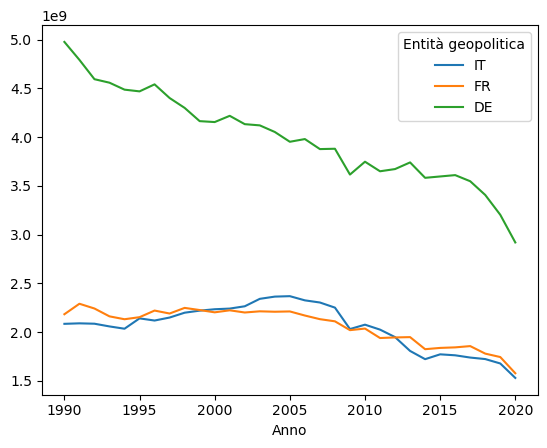

In [35]:
total_emissions.plot.line(y=['IT','FR','DE'])

**OSSERVAZIONE**: dal grafico sembra che la situazione della Germania sia stata e sia attualmente molto peggiore di quelle di Francia e Italia, che vanno circa assieme. Bisogna tenere anzitutto presente che questo grafico misura solamente una fetta delle emissioni (sono esclusi il consumo del suolo e il trasporto internazionale). Inoltre, la popolazione tedesca oggi è di circa 83 milioni di persone, contro i 59 milioni dell'Italia e i 68 milioni della Francia. Dunque queste stime andrebbero rapportate alla popolazione (che peraltro è variata anch'essa negli anni!).

Il grafico seguente tiene conto di un aggiustamento minimo, considerando un rapporto con la popolazione che - per semplicità - è stata fissata come costante negli anni analizzati. Questa decisione influenza la nostra già fin troppo semplificata analisi, che però ha scopi dimostrativi e non vuole essere tecnicamente ineccepibile. In un'analisi più accurata si potrebbero quindi sfruttare i dati demografici sull'andamento della popolazione nel tempo, tratti proprio dai database di Eurostat.

<AxesSubplot:xlabel='Anno'>

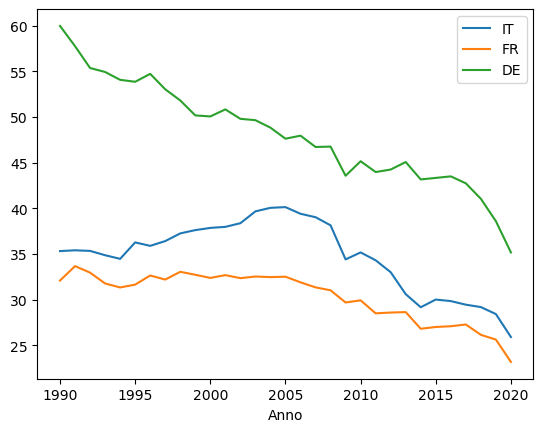

In [36]:
corrected_emissions = pd.DataFrame(data={
    'IT': total_emissions['IT']/59e6,
    'FR': total_emissions['FR']/68e6,
    'DE': total_emissions['DE']/83e6
})
corrected_emissions.plot.line(y=['IT','FR','DE'])

**OSSERVAZIONE:** al grafico mancano titolo, informazioni lungo gli assi, ecc.

Per alcuni tipi di personalizzazione ricorriamo all'importazione diretta di una parte di `matplotlib`. I diversi parametri dovrebbero essere autoesplicativi.

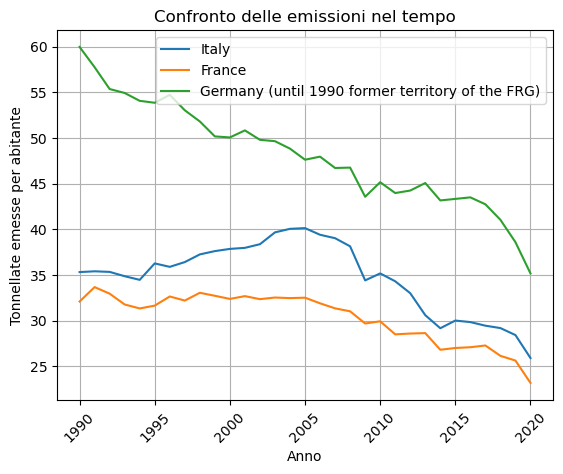

In [37]:
import matplotlib.pyplot as plt

years = [*range(1990,2021)] # Lista di tutti i numeri da 1990 a 2020
countries = ['IT','FR','DE']

corrected_emissions.loc[years,:].plot.line(
    y = countries,
    title = 'Confronto delle emissioni nel tempo',
    xlabel = 'Anno',
    ylabel = 'Tonnellate emesse per abitante',
    label = [geo_dic[k] for k in countries],
    rot = 45, # Rotazione delle etichette sull'asse delle ascisse
    grid = True
)

# Rappresento i dati sull'asse verticale in notazione decimale
plt.ticklabel_format(style='plain')

**OSSERVAZIONE:** i paesi confrontati partono da situazioni iniziali diverse e dunque non è detto che i livelli assoluti siano confrontabili.

Si può avere una migliore idea del successo di un paese nel ridurre le emissioni rispetto ad un certo anno di partenza se si traccia un grafico della riduzione delle emissioni rapportate a quell'anno.

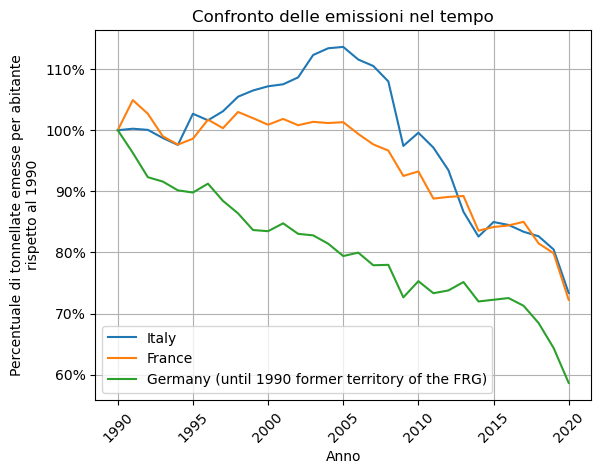

In [38]:
import matplotlib.ticker as mtick

emissions_ratio = 100*corrected_emissions.loc[years]/corrected_emissions.loc[years[0],:]

ax = emissions_ratio.plot.line(
    y = countries,
    title = 'Confronto delle emissioni nel tempo',
    xlabel = 'Anno',
    ylabel = 'Percentuale di tonnellate emesse per abitante\nrispetto al ' + str(years[0]),
    label = [geo_dic[k] for k in countries],
    rot = 45, # Rotazione delle etichette sull'asse delle ascisse
    grid = True
)

# Rappresento i dati sull'asse verticale in notazione decimale
plt.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

Questo grafico chiarisce che la Germania, che inizialmente sembrava essere la pecora nera delle tre, in realtà è l'entità geopolitica che è ha ridotto di più le proprie emissioni a partire dal 1990. Per un confronto serio, l'analisi non dovrebbe fermarsi qui e dovrebbe certamente tenere conto di una quantità molto maggiore di fattori.

Proponiamo anche una versione diversa in cui la percentuale è di volta in volta ricalcolata come variazione rispetto all'anno precedente e viene considerata la somma cumulativa delle percentuali.

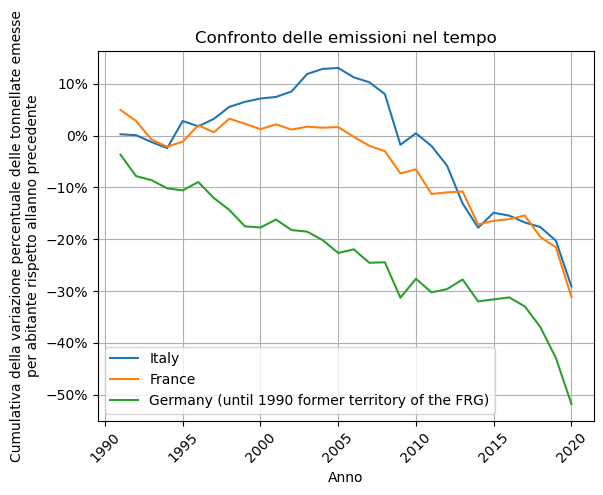

In [39]:
emissions_rate_cumsum = 100*corrected_emissions.pct_change().cumsum()

ax = emissions_rate_cumsum.plot.line(
    y = countries,
    title = 'Confronto delle emissioni nel tempo',
    xlabel = 'Anno',
    ylabel = 'Cumulativa della variazione percentuale delle tonnellate emesse\nper abitante rispetto all''anno precedente',
    label = [geo_dic[k] for k in countries],
    rot = 45, # Rotazione delle etichette sull'asse delle ascisse
    grid = True
)

# Rappresento i dati sull'asse verticale in notazione decimale
plt.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

Qualitativamente, l'andamento è lo stesso di prima. Numericamente stiamo invece tenendo conto della variazione dell'ammontare totale di anno in anno (da questo la differenza nei numeri se si confronta questo con il grafico precedente).

**NOTA:** una buona rappresentazione grafica, in questo caso, sarebbe probabilmente quella tramite un grafico a barre. Avendo solo un dato per anno e non potendo dire quindi molto sugli andamenti stagionali o mensili, che non sono ben descritti dai segmenti rettilinei che li rappresentano, la barra rappresenta meglio il dato. Inoltre, si potrebbero raggruppare gli anni in periodi di 5 anni (o anche più brevi), per mitigare le oscillazioni più piccole.

<AxesSubplot:title={'center':'Confronto delle emissioni nel tempo'}, xlabel='Anno', ylabel='Cumulativa del rapporto tra le tonnellate emesse per abitante\ne le tonnellate emesse per abitante nel periodo precedente'>

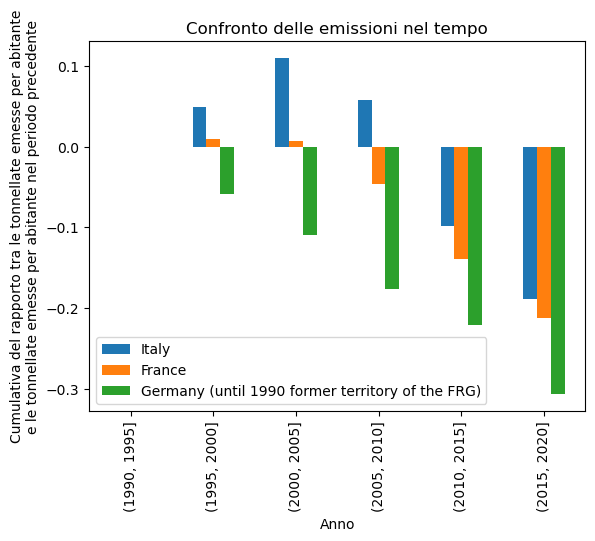

In [40]:
binned_emissions_rate = corrected_emissions.groupby(pd.cut(
    x = corrected_emissions.index,
    bins = pd.interval_range(start = years[0], end = years[-1], freq = 5)
)).sum().pct_change().cumsum()

binned_emissions_rate.plot.bar(
    y = countries,
    title = 'Confronto delle emissioni nel tempo',
    xlabel = 'Anno',
    ylabel = 'Cumulativa del rapporto tra le tonnellate emesse per abitante\ne le tonnellate emesse per abitante nel periodo precedente',
    label = [geo_dic[k] for k in countries],
    rot = 90 # Rotazione delle etichette sull'asse delle ascisse
)

### Torta delle emissioni nel 2020
Con lo stesso procedimento seguito in precedenza si può ottenere una tabella a doppia entrata. Lungo le righe i diversi inquinanti, lungo le colonne le entità geopolitiche.

In [41]:
emissions_by_agents = data[data['Anno'] == 2020][['Inquinante','Entità geopolitica','Tonnellate emesse']]
emissions_by_agents = emissions_by_agents.groupby(['Inquinante','Entità geopolitica'])['Tonnellate emesse'].sum()
emissions_by_agents = emissions_by_agents.unstack()
emissions_by_agents

Entità geopolitica,AT,BE,BG,CH,CY,CZ,DE,DK,EE,EL,...,NL,NO,PL,PT,RO,SE,SI,SK,TR,UK
Inquinante,,,,,,,,,,,,,,,,,,,,,
CH4,4.572040e+06,5.572540e+06,4310640.0,3622120.0,727940.0,8.665980e+06,3.883878e+07,5727020.0,887980.0,7.351860e+06,...,1.335776e+07,3746000.0,3.334414e+07,6.904620e+06,1.710872e+07,3446880.0,1467420.0,2464220.0,4.944166e+07,3.782122e+07
CH4_CO2E,1.143008e+08,1.393125e+08,107768160.0,90553100.0,18199900.0,2.166513e+08,9.709688e+08,143174400.0,22199100.0,1.837961e+08,...,3.339460e+08,93649440.0,8.336043e+08,1.726140e+08,4.277179e+08,86171340.0,36684180.0,61607420.0,1.236041e+09,9.455318e+08
CO2,1.356595e+09,2.044596e+09,656244780.0,751346680.0,154972080.0,2.153817e+09,1.322062e+10,682542460.0,226412160.0,1.148699e+09,...,3.255480e+09,649353540.0,6.065315e+09,8.279434e+08,1.144409e+09,433281400.0,222697940.0,537752860.0,7.739634e+09,6.910734e+09
GHG,1.577848e+09,2.350940e+09,885234860.0,924129580.0,184897480.0,2.542152e+09,1.494850e+10,938608180.0,272685400.0,1.507069e+09,...,3.760078e+09,807627240.0,7.441336e+09,1.126837e+09,1.810830e+09,639506560.0,279839340.0,648146160.0,9.834852e+09,8.453898e+09
HFC_CO2E,3.161862e+07,5.966140e+07,30680800.0,24953880.0,6439140.0,7.234878e+07,1.582351e+08,6022100.0,3325320.0,9.220824e+07,...,2.073496e+07,14579460.0,9.397744e+07,6.000876e+07,3.579390e+07,16895000.0,5310540.0,12219820.0,1.053569e+08,2.103844e+08
HFC_PFC_NSP_CO2E,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2.339940e+06,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
N2O,2.265800e+05,3.443800e+05,302740.0,182760.0,16700.0,3.297200e+05,1.825820e+06,356160.0,69340.0,2.670400e+05,...,4.923800e+05,154160.0,1.499340e+06,2.197000e+05,6.763000e+05,339960.0,49420.0,121460.0,2.520660e+06,1.268240e+06
N2O_CO2E,6.752516e+07,1.026580e+08,90223360.0,54467120.0,4995420.0,9.823100e+07,5.441253e+08,106140240.0,20702080.0,7.961992e+07,...,1.467137e+08,45957500.0,4.468225e+08,6.547672e+07,2.015376e+08,101362140.0,14718860.0,36189980.0,7.511693e+08,3.779572e+08
NF3_CO2E,2.167200e+05,1.531800e+05,0.0,7380.0,0.0,3.870000e+04,1.944000e+05,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,6.480000e+03


Ed ecco la torta delle emissioni italiane nel 2020, con le conversioni in ammontare di CO<sub>2</sub>:

<AxesSubplot:>

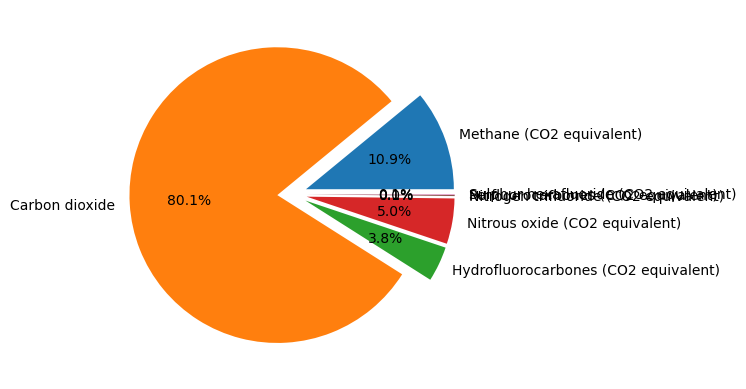

In [42]:
emissions_by_agents_IT = emissions_by_agents.loc[airpol_dic_noagg_co2e.keys(),'IT']
emissions_by_agents_IT.plot.pie(
    autopct='%1.1f%%',
    labels = airpol_dic_noagg_co2e.values(),
    explode = (0.1,) * len(airpol_dic_noagg_co2e),
    ylabel = ''
)

Alcuni valori osservati sono troppo piccoli in confronto agli altri. Proviamo a raggrupparli in un'unica categoria chiamata genericamente `'Other greenhouse gases (CO2 equivalent)'`. Aggreghiamo in questa categoria tutti i gas che costituiscono ciascuno una percentuale inferiore ad 1% del totale delle emissioni. Costruiamo quindi la serie di dati che contenga questa categoria.

In [43]:
# Data selection and aggregation
to_include = (emissions_by_agents_IT/emissions_by_agents_IT.sum() >= 0.01)
emissions_by_agents_IT_mod = pd.concat([
    emissions_by_agents_IT[to_include],
    pd.Series(data=emissions_by_agents_IT[~to_include].sum(), index=['Oth'])
])

Costruiamo adesso il dizionario per questa serie di dati modificata:

In [44]:
# Dictionary modification
airpol_dic_noagg_co2e_mod = airpol_dic_noagg_co2e.copy()
airpol_dic_noagg_co2e_mod['Oth'] = 'Other greenhouse gases (CO2 equivalent)'
for k in emissions_by_agents_IT[~to_include].index:
    del airpol_dic_noagg_co2e_mod[k]

Il grafico adesso risulta come segue:

<AxesSubplot:>

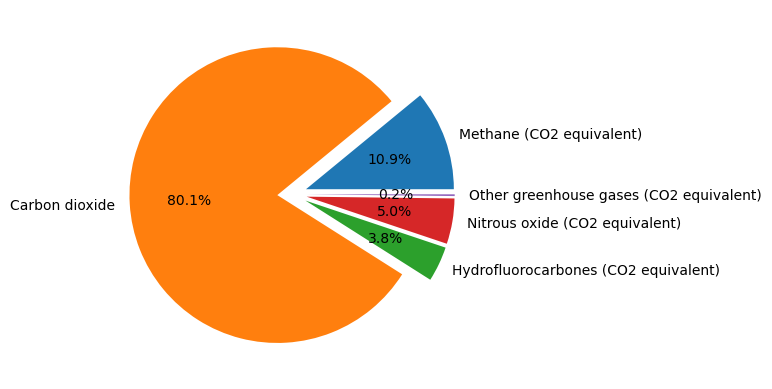

In [45]:
# Plotting
emissions_by_agents_IT_mod.plot.pie(
    autopct='%1.1f%%',
    labels = airpol_dic_noagg_co2e_mod.values(),
    explode = (0.1,) * len(airpol_dic_noagg_co2e_mod),
    ylabel = ''
)